**Gaurav Anand** \\
**Manuraj P M  213230012**

In [90]:
#import related liabrary
import numpy as np
import pandas as pd

# PART 4

In [91]:
#input data frame for dimension reduction..
data_KPCA = pd.read_csv('DataKPCA.csv')
data_KPCA.head()

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


In [127]:
data_KPCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


**OBSERVATIONS** \\


1.   The given dataframe has 7 columns(7 dimension) and 190 diffrent observations or datas.
2.   No missing values and all datas are floating point.



**Non-Linear Dimension Reduction** \\
Using Kernal Principle Component Analysis


In [93]:
#Let's see the dimension
columns = data_KPCA.columns
columns = np.array(columns)
columns

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype=object)

In [94]:
#Sperate each dimension for plotting the input data
x1 = data_KPCA['x1']
x1 = np.array(x1)
x2 = np.array(data_KPCA['x2'])
x3 = np.array(data_KPCA['x3'])
x4 = np.array(data_KPCA['x4'])
x5 = np.array(data_KPCA['x5'])
x6 = np.array(data_KPCA['x6'])
x7 = np.array(data_KPCA['x7'])

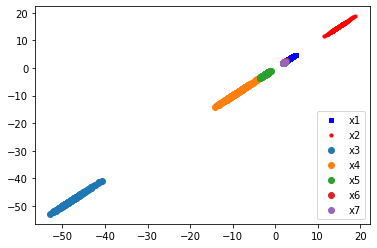

In [95]:
#Visualize input data
#Indivigual dimesions grouped together..Column wise
import matplotlib.pyplot as plt
plt.scatter(x1,x1,s=10, c='b', marker="s")
plt.scatter(x2,x2,s=10, c='r', marker="o")
plt.scatter(x3,x3)
plt.scatter(x4,x4)
plt.scatter(x5,x5)
plt.scatter(x6,x6)
plt.scatter(x7,x7)
plt.legend(labels=['x1','x2','x3','x4','x5','x6','x7'], loc='lower right');

In [96]:
#For training let's use Normalized data values
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()
scaler.fit(data_KPCA)

StandardScaler()

In [98]:
#Transform the orginal data to normalized
normal_data_KPCA = scaler.transform(data_KPCA)

In [99]:
#Train KPCA for 2 dimension
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel = 'rbf')

In [100]:
#Fit the model to our input scaled data
X_fit = kpca.fit_transform(normal_data_KPCA)

In [101]:
#Data in Reduced dimesion
X_fit.shape

(190, 2)

**EXPLAINED VARIANCE for 2D** 

In [104]:
#To get the explained variance for 2-D
expl_var_kpca = np.var(X_fit, axis=0)
expl_var_kpca

array([0.14807904, 0.10631211])

Text(0, 0.5, 'Explained Variance')

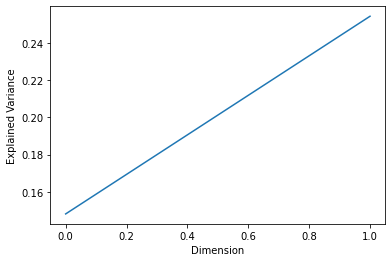

In [108]:
plt.plot(np.cumsum(expl_var_kpca))
plt.xlabel("Dimension")
plt.ylabel("Explained Variance")

In [112]:
#Let's check for 3D
kpca3 = KernelPCA(n_components=3,kernel = 'rbf')
X_fit3 = kpca3.fit_transform(normal_data_KPCA)

In [125]:
X_fit3[1] #Only interested with dimension of data 
#So that's why printed first element.

array([ 0.00538125, -0.23512604, -0.48585489])

In [116]:
#To get the explained variance for 3-D
expl_var_kpca3 = np.var(X_fit3, axis=0)
expl_var_kpca3

array([0.14807904, 0.10631211, 0.09957545])

Text(0, 0.5, 'Explained Variance')

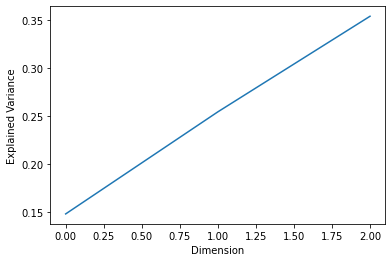

In [118]:
#To plot the explained variance...
plt.plot(np.cumsum(expl_var_kpca3))
plt.xlabel("Dimension")
plt.ylabel("Explained Variance")

**10-D KPCA**

In [120]:
#Let's check for 10d
kpca10 = KernelPCA(n_components=10,kernel = 'rbf')
X_fit10 = kpca10.fit_transform(normal_data_KPCA)

In [122]:
X_fit10[1] #Let's see the first data else it will messy..

array([ 0.00538125, -0.23512604, -0.48585489, -0.05894817,  0.0226161 ,
        0.04262842,  0.0304442 ,  0.04481696,  0.0971946 , -0.01597777])

In [123]:
expl_var_kpca10 = np.var(X_fit10, axis=0)
expl_var_kpca10

array([0.14807904, 0.10631211, 0.09957545, 0.04579814, 0.04268317,
       0.03428645, 0.02913138, 0.02046354, 0.01659669, 0.01434459])

Text(0, 0.5, 'Explained Variance')

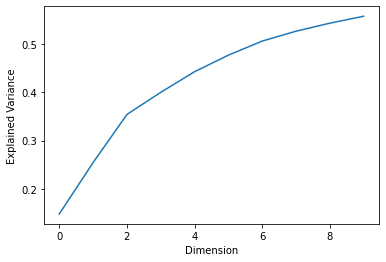

In [124]:
plt.plot(np.cumsum(expl_var_kpca10))
plt.xlabel("Dimension")
plt.ylabel("Explained Variance")

**CONCLUSIONS** \\


*   As we increase the dimension of KPCA explained variance increses
*   Variance is slightly above 50% even in 10 dimension

*   In array the indexing starts with zero that's why its started from 0th dimension and ends at 9th dimension.
*   Explained variance not yet saturated..





**References** \\
[1]$\,\,\,\,\,\,$[Dimesion reduction on KPCA from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) \\
[2]$\,\,\,\,\,\,$[Explained Variance Concepts](https://vitalflux.com/pca-explained-variance-concept-python-example/) \\
[3]$\,\,\,\,\,\,$[scikit-learn kernel PCA explained variance](https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance) \\
[4]$\,\,\,\,\,\,$Aurélien Géron, Hands-on Machine Learning with
Scikit-Learn, Keras, and 
Tensor Flow,  *from page no 222*

